# Hands-On Session No. 4
## (Training CNNs on CIFAR10)




### Q1: Load the CIFAR10 data and visualize the first batch
a) Try some data augmentation

0it [00:00, ?it/s]

170500096it [00:02, 70273744.37it/s]                               


Files already downloaded and verified


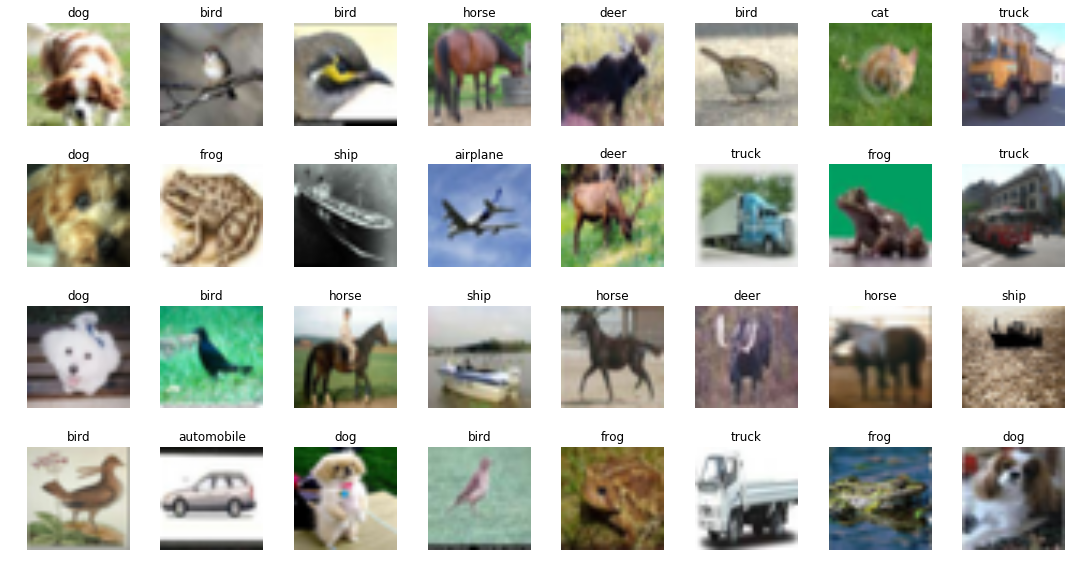

In [3]:
import torch

import matplotlib.pyplot as plt

from torchvision import datasets, transforms
  

batch_size = 32

transform_train = transforms.Compose([
#     transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

transform_test = transforms.Compose([
    transforms.ToTensor()
])


# datasets (CIFAR10)
mnist_train = datasets.CIFAR10('/data', train=True, download=True, transform=transform_train)
mnist_test = datasets.CIFAR10('/data', train=False, download=True, transform=transform_test)

# dataloaders
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, pin_memory=True)


def visualize_batch(batch, labels, ncols=8):
  nrows = (batch.shape[0] + ncols - 1) // ncols
  plt.figure(figsize=(15, 2*nrows))
  for i in range(batch.shape[0]):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(batch[i].permute(1, 2, 0).squeeze(), interpolation='bilinear')
    plt.title(labels[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()


label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##################  Change these lines  ####################################
# use the above function to visualize the first batch of the dataset

batch, labels = next(iter(train_loader))
visualize_batch(batch, [label_names[x] for x in labels])

##################  Finish changing here  ##################################

### Q1: Create the network
a) Try with different models and make your own variations

In [0]:
import torch.nn as nn

# class Flatten(nn.Module):
#     def forward(self, x):
#         out = x.view(x.shape[0],-1)
#         return out


# model = nn.Sequential(
#     Flatten(),
#     nn.Linear(32*32*3, 10)
# )

# model = nn.Sequential(
#     nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5,),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     Flatten(),
#     nn.Linear(16 * 6 * 6, 16 * 6 * 3),
#     nn.ReLU(), 
#     nn.Linear(16 * 6 * 3, 100),
#     nn.ReLU(), 
#     nn.Linear(100, 10) 
# )

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

model = Net()

### Q3: Set the hyperparameters, the loss function and the optimizer
a) Try first with SGD and then with the Adam optimization method

In [5]:
# learning rate
lr = 0.001

# number of epochs
n_epochs = 10

# loss function
lossf = torch.nn.CrossEntropyLoss()

##################  Change these lines  ####################################
# optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=lr, nesterov=True)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
##################  Finish changing here  ##################################

# set device to use
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cuda


Net(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU(inplace)
   

### Q4: Train the network

In [6]:
# iterate on epochs
for i in range(n_epochs):
  
  train_loss = 0.0
  train_accuracy = 0.0
  test_accuracy = 0.0
  
  
  model.train()
  # iterate on batches
  for samples, targets in train_loader:
    samples, targets = samples.to(device), targets.to(device)
    
    ##################  Change these lines  ####################################
    # TODO: compute the ouput of the network, the loss, do the backprop and an 
    # optimization step
    outputs = model(samples)
    loss = lossf(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ##################  Finish changing here  ##################################
    
    train_loss += loss.mean().item() * samples.shape[0]
    train_accuracy += torch.sum(outputs.max(dim=1)[1] == targets).item() 
    
  
  model.eval()
  # iterate on batches
  for samples, targets in test_loader:
    samples, targets = samples.to(device), targets.to(device)
    outputs = model(samples)
    test_accuracy += torch.sum(outputs.max(dim=1)[1] == targets).item() 
    
  train_loss /= len(mnist_train)
  train_accuracy /= len(mnist_train)
  test_accuracy /= len(mnist_test)
  
  print('epoch: %d train-error: %.4f train-acc: %.4f test-acc: %.4f' % (i, train_loss, train_accuracy, test_accuracy))

epoch: 0 train-error: 1.4298 train-acc: 0.4684 test-acc: 0.6072
epoch: 1 train-error: 0.9994 train-acc: 0.6455 test-acc: 0.6882
epoch: 2 train-error: 0.8144 train-acc: 0.7119 test-acc: 0.7456
epoch: 3 train-error: 0.7076 train-acc: 0.7517 test-acc: 0.7447
epoch: 4 train-error: 0.6230 train-acc: 0.7826 test-acc: 0.7718
epoch: 5 train-error: 0.5598 train-acc: 0.8037 test-acc: 0.7903
epoch: 6 train-error: 0.5051 train-acc: 0.8246 test-acc: 0.7989
epoch: 7 train-error: 0.4521 train-acc: 0.8413 test-acc: 0.7940
epoch: 8 train-error: 0.4128 train-acc: 0.8555 test-acc: 0.8006
epoch: 9 train-error: 0.3741 train-acc: 0.8682 test-acc: 0.8062


### Q5: Show some prediction examples

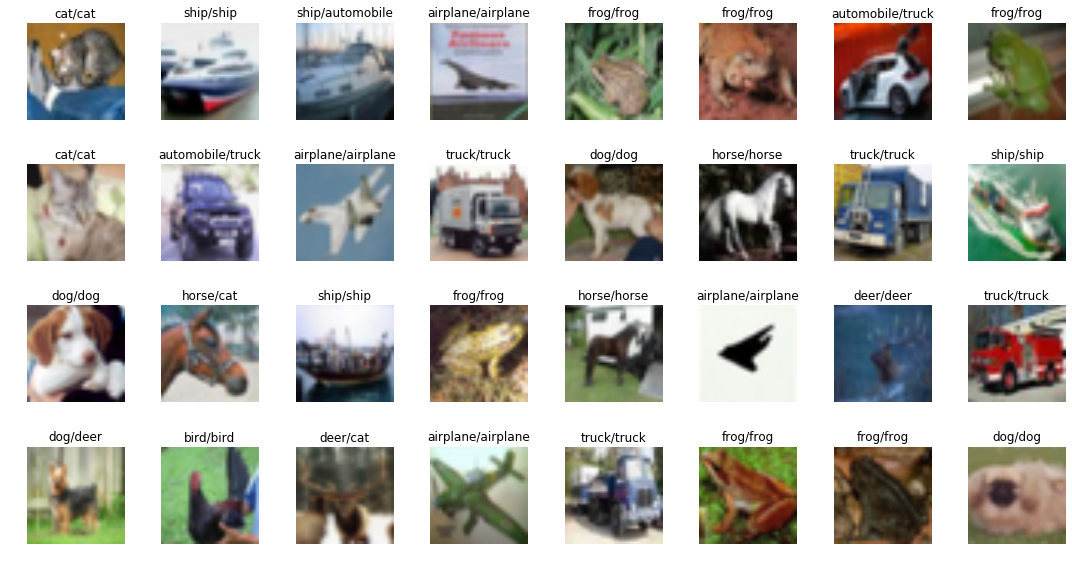

In [7]:
model.cpu()
samples, labels = next(iter(test_loader))
outputs = model(samples)
pred = outputs.max(dim=1)[1]
visualize_batch(samples, ['%s/%s' % (label_names[labels[i]], label_names[pred[i]]) for i in range(len(labels))])

### Q6: Show the confussion matrix

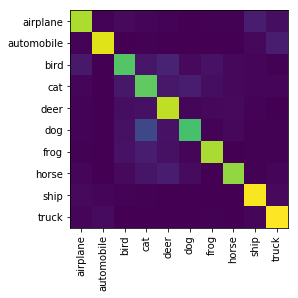

In [8]:
import numpy as np

model.to(device)
model.eval()
matrix = np.zeros(shape=(10,10))
# iterate on batches
for samples, targets in test_loader:
  samples, targets = samples.to(device), targets.to(device)
  outputs = model(samples)
  pred = outputs.max(dim=1)[1]
  
  ##################  Change these lines  ####################################
  # TODO: update the confussion matrix   
  for i in range(targets.shape[0]):
      matrix[targets[i]][pred[i]] += 1
  ##################  Finish changing here  ################################## 


plt.imshow(matrix)
plt.xticks(range(10), label_names, rotation='vertical');
plt.yticks(range(10), label_names);

### Q7: Show the probabilities

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


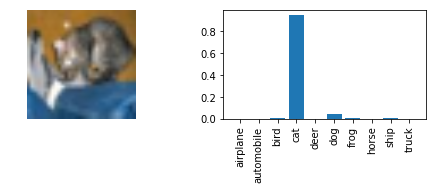

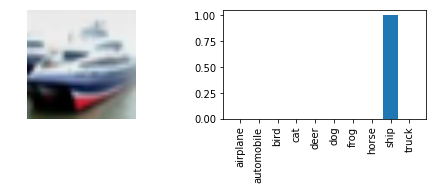

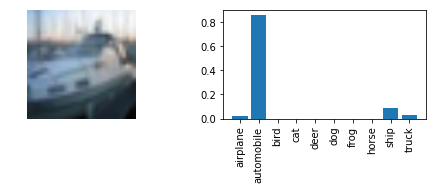

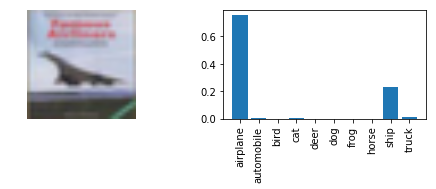

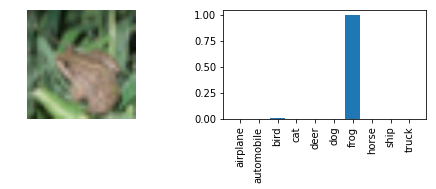

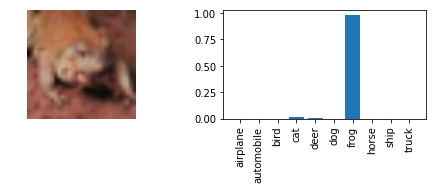

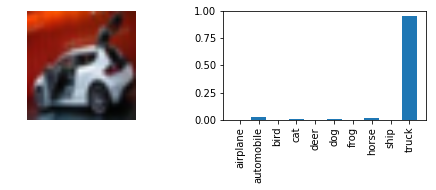

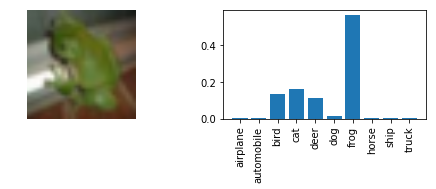

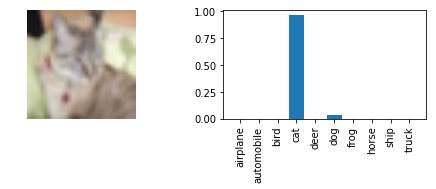

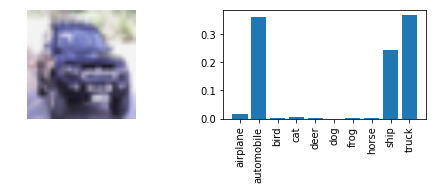

In [9]:
import torch.nn.functional as F


batch, labels = next(iter(test_loader))
model.cpu()
model.eval()

for i in range(10):
    plt.figure(figsize=(8,2))
    test_image = batch[i]
    
    plt.subplot(1,2,1)
    plt.imshow(test_image.permute(1, 2, 0).squeeze(), interpolation='bilinear')
    plt.axis('off')

    plt.subplot(1,2,2)
    
    ##################  Change these lines  ####################################
    # TODO: fix the probabilities (to be between 0 and 1)
    p = F.softmax(model(test_image[None]).detach().squeeze())
    ##################  Finish changing here  ##################################
    
    plt.bar(range(len(p)), p)
    plt.xticks(range(len(p)), label_names, rotation='vertical')
    plt.show()